In [20]:
# ==============================================
# INCOME EVALUATION PROJECT - DATA ANALYSIS
# ==============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DS DATA.csv")

# View basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()


Shape: (32561, 16)

Columns: ['Age', 'Profession Class', 'Final_census', ' Education', ' Education-num', ' marital-status', ' occupation', ' relationship', ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week', ' country', ' income', 'Unnamed: 15']


,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [21]:
# Clean column names
df.columns = [c.strip().replace(' ', '_') for c in df.columns]
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Drop useless column

# Strip extra spaces from string values
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip()

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop rows with too many NaN values (optional)
df.dropna(thresh=len(df.columns)//2, inplace=True)

# Target & features
target = 'income'
X = df.drop(columns=[target])
y = df[target]

# Check missing summary
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 Age                    0
Profession_Class    1836
Final_census           0
Education              0
Education-num          0
marital-status         0
occupation          1843
relationship           0
race                   0
Gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
country              583
income                 0
dtype: int64



Target value counts:
 income
<=50K    24720
>50K      7841
Name: count, dtype: int64


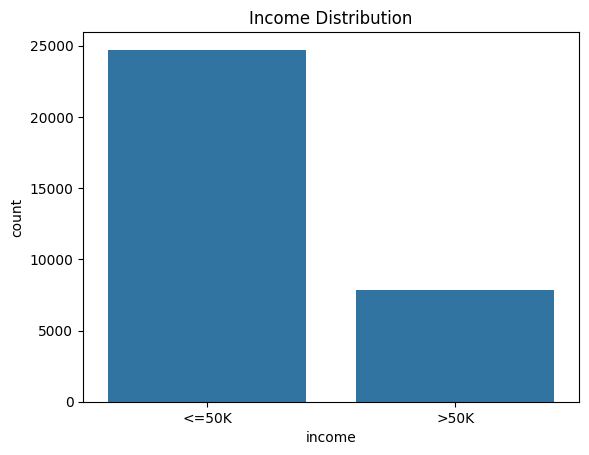

                Age  Final_census  Education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Profession_Class top values:
 Profession_Class
Private        

In [22]:
# Target distribution
print("\nTarget value counts:\n", y.value_counts())

sns.countplot(x=y)
plt.title("Income Distribution")
plt.show()

# Numeric summary
print(df.describe())

# Categorical overview
for col in X.select_dtypes(include='object').columns[:5]:
    print(f"\n{col} top values:\n", X[col].value_counts().head(5))


In [23]:
from sklearn.model_selection import StratifiedKFold, cross_val_score


num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Preprocessing pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # Random Forest pipeline
# rf_pipe = Pipeline([
#     ('prep', preprocessor),
#     ('model', RandomForestClassifier(n_estimators=200, random_state=42))
# ])

# rf_pipe.fit(X_train, y_train)
# y_pred = rf_pipe.predict(X_test)
# y_prob = rf_pipe.predict_proba(X_test)[:,1]

# # Evaluation
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("ROC-AUC:", roc_auc_score((y_test=='>50K').astype(int), y_prob))



Logistic Regression:
Accuracy: 0.856, F1: 0.673, ROC-AUC: 0.908

Decision Tree:
Accuracy: 0.810, F1: 0.619, ROC-AUC: 0.753

Random Forest:
Accuracy: 0.858, F1: 0.683, ROC-AUC: 0.907


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:56:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost:
Accuracy: 0.877, F1: 0.725, ROC-AUC: 0.930

Model Comparison:


,Model,Accuracy,F1,ROC-AUC
3,XGBoost,0.876708,0.724906,0.929707
0,Logistic Regression,0.855827,0.673391,0.907801
2,Random Forest,0.857516,0.682843,0.906831
1,Decision Tree,0.810379,0.619414,0.752525


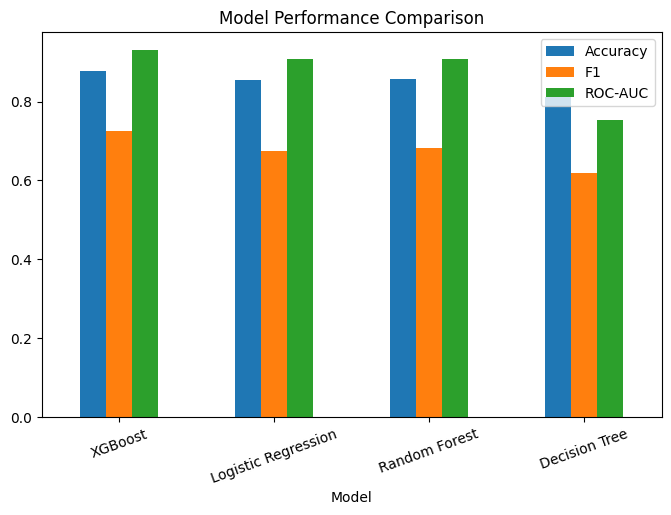

In [24]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Encode target as numeric (for XGBoost compatibility)
y_encoded = y.map({'<=50K': 0, '>50K': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []

for name, model in models.items():
    pipe = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append((name, acc, f1, auc))
    print(f"\n{name}:")
    print(f"Accuracy: {acc:.3f}, F1: {f1:.3f}, ROC-AUC: {auc:.3f}")

# Compare results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1", "ROC-AUC"]).sort_values(by="ROC-AUC", ascending=False)
print("\nModel Comparison:")
display(results_df)

# Plot comparison
results_df.set_index("Model")[["Accuracy", "F1", "ROC-AUC"]].plot(kind="bar", figsize=(8, 5), title="Model Performance Comparison")
plt.xticks(rotation=20)
plt.show()


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Pipeline for XGBoost
xgb_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False
    ))
])

# Parameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.8, 1],
    'model__colsample_bytree': [0.8, 1]
}

# RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rs.fit(X_train, y_train)
print("Best parameters:", rs.best_params_)

# Evaluate tuned model
best_model = rs.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print("\nTuned Model ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:57:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'model__subsample': 1, 'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.8}

Tuned Model ROC-AUC: 0.9311586249767854

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4945
           1       0.79      0.67      0.72      1568

    accuracy                           0.88      6513
   macro avg       0.84      0.81      0.82      6513
weighted avg       0.87      0.88      0.87      6513



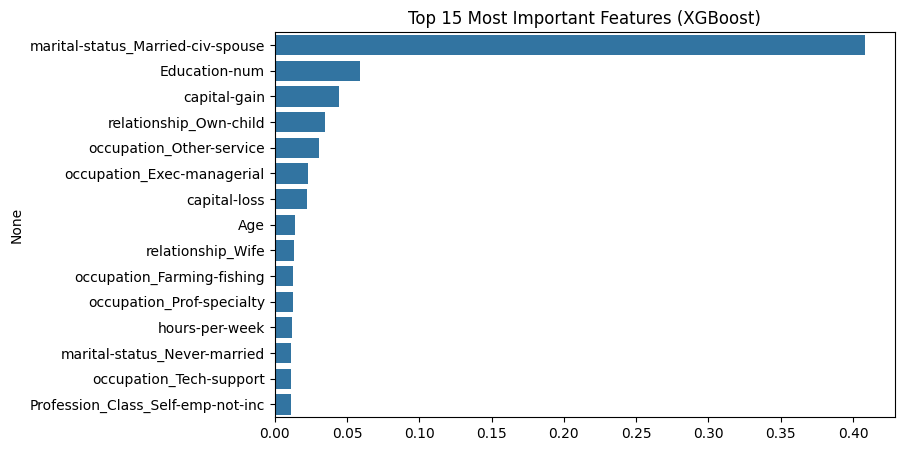

In [26]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

# Access trained XGBoost model inside pipeline
xgb_model = best_model.named_steps['model']

# Get feature names after preprocessing
ohe = best_model.named_steps['prep'].named_transformers_['cat'].named_steps['encoder']
cat_features = ohe.get_feature_names_out(X.select_dtypes(include='object').columns)
num_features = X.select_dtypes(include=['int64','float64']).columns
feature_names = np.concatenate([num_features, cat_features])

# Plot top 15
importances = pd.Series(xgb_model.feature_importances_, index=feature_names).sort_values(ascending=False)[:15]
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Top 15 Most Important Features (XGBoost)")
plt.show()


In [27]:
import joblib
joblib.dump(best_model, "Best_XGBoost_Model.pkl")
print("✅ Saved tuned model successfully!")


✅ Saved tuned model successfully!
